In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
import math
import random
from IPython import display
from scipy.signal import savgol_filter

df=pd.read_csv("Dataset.csv")
df.head()

,X1,X2,Y
0,42,74,0
1,33,75,0
2,61,51,1
3,94,41,1
4,55,93,0


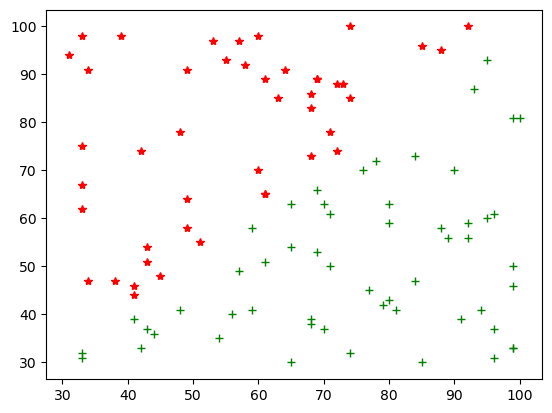

In [2]:
X1=df["X1"].values.tolist()
X2=df["X2"].values.tolist()
Y=df["Y"].values.tolist()

for i in range(len(Y)):
    if Y[i]==0:
        plt.plot(X1[i],X2[i],"r*")
    else:
        plt.plot(X1[i], X2[i], "g+")
        

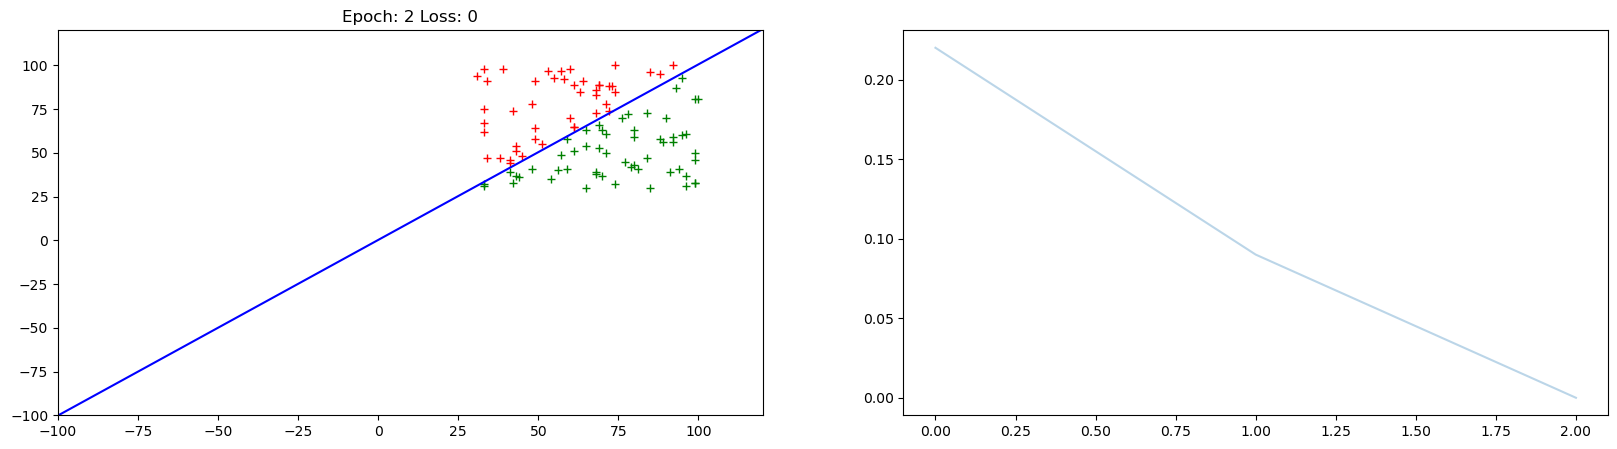

Epoch: 2 Loss: 0.0


In [3]:
w = [random.uniform(-1, 1), random.uniform(-1, 1)]
b = random.uniform(-1, 1)


lr = 0.01  

theta = 0.05
epoch = 0
count = 0
loss = []

while count < len(Y):
    total_error = 0
    for i in range(len(Y)):
        weighted_sum = w[0] * X1[i] + w[1] * X2[i] + b
        pred = 1 if weighted_sum > theta else 0
        error = Y[i] - pred
        
        if error != 0:
            count = 0
            total_error += math.sqrt(error ** 2)
            w[0] += lr * error * X1[i]
            w[1] += lr * error * X2[i]
            b += lr * error
        else:
            count += 1
    
    loss.append(1 / len(X1) * total_error)
    
    plt.figure(figsize=(20, 5))
    display.clear_output(wait=True)
    plt.subplot(1, 2, 1)
    
    for i in range(len(Y)):
        plt.plot(X1[i], X2[i], "r+" if Y[i] == 0 else "g+")
    
    plt.xlim([-100, 120])
    plt.ylim([-100, 120])
    
    xintr = (theta - b) / w[0]
    yintr = (theta - b) / w[1]
    slope = -yintr / xintr
    xx = plt.xlim()
    yy = [slope * i + yintr for i in xx]
    
    plt.plot(xx, yy, 'b-')
    plt.title(f"Epoch: {epoch} Loss: {total_error}")
    
    plt.subplot(1, 2, 2)
    plt.plot(loss, alpha=0.3)
    if epoch > 20:
        yhat = savgol_filter(loss, 21, 3)
        plt.plot(yhat, 'r--', lw=3)
    
    plt.show()
    
    print(f"Epoch: {epoch} Loss: {loss[-1]}")
    epoch += 1

        
            
    